<a href="https://colab.research.google.com/github/AlvaroGarcia-Cid/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)

60000
(60000, 784)


In [ ]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images=train_images[50000:]
train_images=train_images[:49999]
validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]
print(len(validation_images))
print(len(validation_labels))

10000
10000


In [ ]:
def crea_modelo(regularizador):
  network = models.Sequential()
  if regularizador==0:
    network.add(layers.Dense(512,  activation='relu', input_shape=(28*28,)))
  elif regularizador==1:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))
  elif regularizador==2:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
  elif regularizador==3:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu', input_shape=(28*28,)))
  elif regularizador==4:
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dropout(0.5))
  else:
    print('El número no es válido')
  network.add(layers.Dense(10, activation='softmax'))
  network.summary()
  return network
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

In [ ]:
def compila_modelo(modelo): 
  modelo.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo

In [ ]:
def entrena_modelo(modelo):
  history = modelo.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(validation_images, validation_labels))
  return history
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [ ]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 4ms/step - loss: 0.2828 - accuracy: 0.9185 - val_loss: 0.1459 - val_accuracy: 0.9593
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1158 - accuracy: 0.9659 - val_loss: 0.1088 - val_accuracy: 0.9687
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.0854 - val_accuracy: 0.9727
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0800 - val_accuracy: 0.9754
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0770 - val_accuracy: 0.9775
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0754 - val_accuracy: 0.9781
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.0775 - val_accuracy: 0.9791
Epoch 

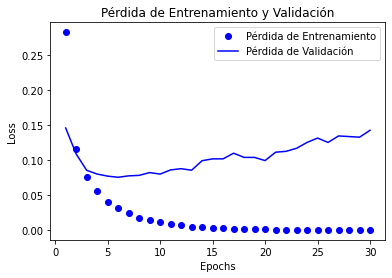

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

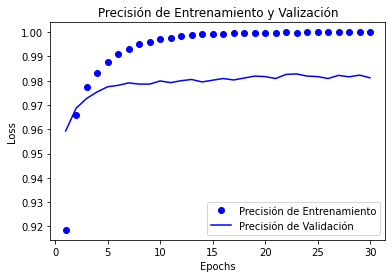

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 3s 5ms/step - loss: 2.1426 - accuracy: 0.8445 - val_loss: 1.1107 - val_accuracy: 0.8673
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9731 - accuracy: 0.8779 - val_loss: 0.8643 - val_accuracy: 0.9081
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8473 - accuracy: 0.8979 - val_loss: 0.7387 - val_accuracy: 0.9316
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7677 - accuracy: 0.9145 - val_loss: 0.7092 - val_accuracy: 0.9314
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7148 - accuracy: 0.9236 - val_loss: 0.6602 - val_accuracy: 0.9378
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6745 - accuracy: 0.9304 - val_loss: 0.6182 - val_accuracy: 0.9455
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6451 - accuracy: 0.9361 - val_loss: 0.6351 - val_accuracy: 0.9376
Epoch 

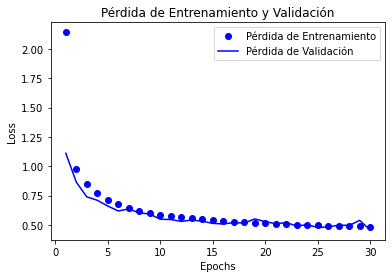

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

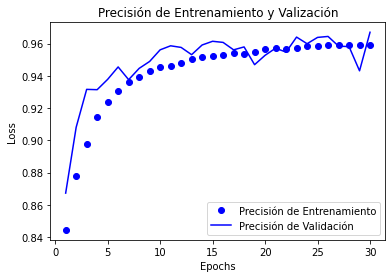

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [ ]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 3s 5ms/step - loss: 0.5244 - accuracy: 0.9127 - val_loss: 0.2906 - val_accuracy: 0.9561
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2651 - accuracy: 0.9547 - val_loss: 0.2231 - val_accuracy: 0.9625
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2118 - accuracy: 0.9628 - val_loss: 0.1875 - val_accuracy: 0.9697
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1870 - accuracy: 0.9672 - val_loss: 0.1981 - val_accuracy: 0.9647
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1720 - accuracy: 0.9694 - val_loss: 0.1700 - val_accuracy: 0.9712
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1639 - accuracy: 0.9716 - val_loss: 0.1575 - val_accuracy: 0.9738
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1562 - accuracy: 0.9732 - val_loss: 0.1883 - val_accuracy: 0.9641
Epoch 

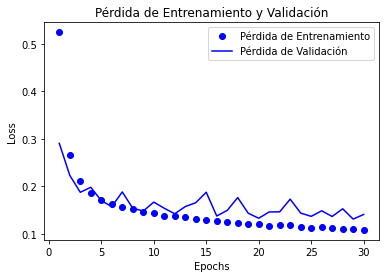

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

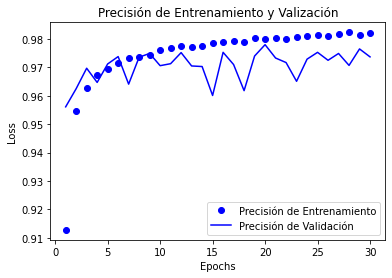

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 3s 7ms/step - loss: 2.3301 - accuracy: 0.8241 - val_loss: 1.0648 - val_accuracy: 0.8772
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 1.0572 - accuracy: 0.8564 - val_loss: 0.9731 - val_accuracy: 0.8833
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9578 - accuracy: 0.8753 - val_loss: 0.8766 - val_accuracy: 0.9042
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8850 - accuracy: 0.8903 - val_loss: 0.8331 - val_accuracy: 0.9024
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8314 - accuracy: 0.9009 - val_loss: 0.7548 - val_accuracy: 0.9259
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7884 - accuracy: 0.9080 - val_loss: 0.7743 - val_accuracy: 0.9078
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7555 - accuracy: 0.9141 - val_loss: 0.6971 - val_accuracy: 0.9316
Epoch 

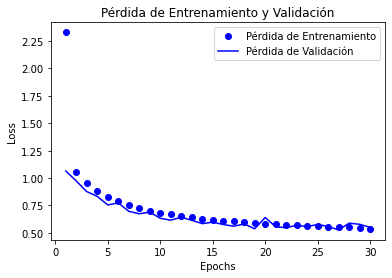

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

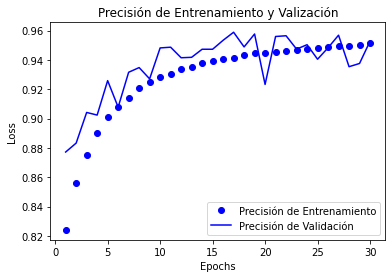

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [ ]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3425 - accuracy: 0.8990 - val_loss: 0.1611 - val_accuracy: 0.9542
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1675 - accuracy: 0.9513 - val_loss: 0.1180 - val_accuracy: 0.9672
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.9618 - val_loss: 0.0933 - val_accuracy: 0.9741
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9690 - val_loss: 0.0824 - val_accuracy: 0.9770
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.0834 - val_accuracy: 0.9765
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0814 - accuracy: 0.9757 - val_loss: 0.0786 - val_accuracy: 0.9796
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9781 - val_loss: 0.0772 - val_accuracy: 0.9788
Epoch 

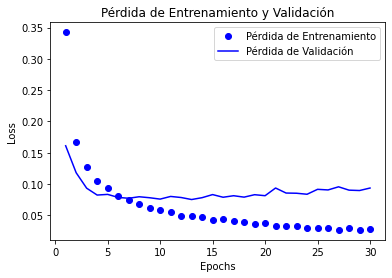

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

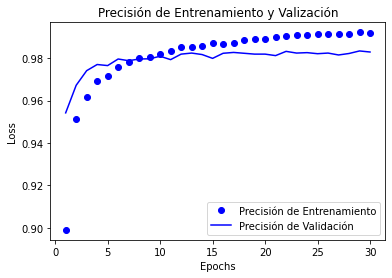

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [ ]:
network5 = crea_modelo(5)

El número no es válido


ValueError: ignored

### CONCLUSIONES

Viendo las distintos resultados obtenidos al realizar los diversos modelos comprobamos que el modelo que mejor actúa es el modelo en que utilizamos dropout.

En cuanto a los regularizadores l1 y l2, tenemos que el mejor modelo es aquel en el que utilizamos el regularizador l2 que es el más parecido al modelo en el cual empleamos dropout.

Por último se encuentran los modelos en los que empleamos el regularizador l1 y l1 con l2 que son iguales prácticamente pero peores que los otros dos casos mencionados anteriormente.

Claramente los modelos en los que utilizamos regularizadores son mucho mejores que el caso en el cual no utilizamos ninguno de ellos.
